In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


 
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")
train.shape
test.shape
# PassengerId – 乗客識別ユニークID
# Survived – 生存フラグ（0=死亡、1=生存）
# Pclass – チケットクラス
# Name – 乗客の名前
# Sex – 性別（male=男性、female＝女性）
# Age – 年齢
# SibSp – タイタニックに同乗している兄弟/配偶者の数
# parch – タイタニックに同乗している親/子供の数
# ticket – チケット番号
# fare – 料金
# cabin – 客室番号
# Embarked – 出港地（タイタニックへ乗った港）


train_x = train.drop(["Survived", "Name", "Cabin", "Ticket", "PassengerId"], axis=1)
test_x = test.drop(["Name", "Cabin", "Ticket", "PassengerId"], axis=1)
train_y = train["Survived"]


# 欠損値を年齢の中央値。出港地は最多のSで補完
train_x["Age"] = train_x["Age"].fillna(train_x["Age"].median())
train_x["Embarked"] = train_x["Embarked"].fillna("S")

test_x["Age"] = test_x["Age"].fillna(test_x["Age"].median())
test_x["Fare"] = test_x["Fare"].fillna(test_x["Fare"].median())
test_x["Embarked"] = test_x["Embarked"].fillna("S")


train_x_dummy = pd.get_dummies(train_x,columns=["Sex","Embarked"])
test_x_dummy = pd.get_dummies(test_x,columns=["Sex","Embarked"])

X_train, X_test, y_train, y_test = train_test_split(train_x_dummy, train_y, test_size=0.3, random_state=101)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1])

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_test, predictions))
print('accuracy = ', accuracy_score(y_test, predictions))
print('precision = ', precision_score(y_test, predictions))
print('recall = ', recall_score(y_test, predictions))
print('f1 score = ', f1_score(y_test, predictions))

confusion matrix = 
 [[135  19]
 [ 33  81]]
accuracy =  0.8059701492537313
precision =  0.81
recall =  0.7105263157894737
f1 score =  0.7570093457943925


In [4]:
y_proba = rfc.predict_proba(X_test)[: , 1]
print(y_proba.shape)

(268,)


AUC curve : 0.854295
accuracy: 0.7947761194029851
f1_score: 0.7488584474885845


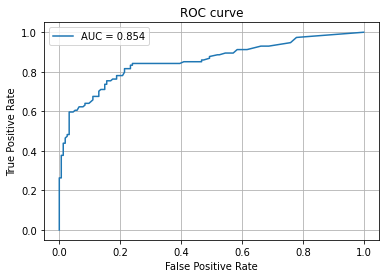

In [7]:
from sklearn.metrics import (roc_curve, auc, accuracy_score) 
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


# AUCスコアを出す
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print ("AUC curve : %f" % roc_auc)


auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print('accuracy:',accuracy_score(y_test, predictions))
print('f1_score:',f1_score(y_test, predictions))